In [1]:
%matplotlib inline

Signal Space Projection (SSP) Math
---------

We can write the measured signal $b \in \mathbb{R}^{C \times T}$ as

$$ b = b_s + b_n$$

where $b_s\in \mathbb{R}^{C \times T}$ is the brain signals and $b_n(t) \in \mathbb{R}^{C \times T}$ is the noise

Noise $b_n$ can be:
* ambient sensor noise
* electrophysiological corruption
 * cardiac
 * ocular

Now, we can apply PCA on $b_n$ and keep only top $M$ components with loadings $ c_n \in \mathbb{R}^M$:
    
$$ b_n = Uc_n + e_n$$

where $U = [b_1, ..., b_M] \in \mathbb{R}^{C \times M}$ are the orthonormal basis.

Now, the SSP operator $P_{\perp} \in \mathbb{R}^{C \times C}$ is given by:

$$ P_{\perp} = I - UU{^\top} $$

so that:

$$b_s \approx P_{\perp}b$$


Artifact Correction with SSP
============================

This tutorial explains how to estimate Signal Subspace Projectors (SSP)
for correction of ECG and EOG artifacts.

In [2]:
import numpy as np

import mne
from mne.datasets import sample
from mne.preprocessing import compute_proj_ecg, compute_proj_eog

# getting some data ready
data_path = sample.data_path()
raw_fname = data_path / 'MEG/sample/sample_audvis_filt-0-40_raw.fif'

raw = mne.io.read_raw_fif(raw_fname, preload=True)

Opening raw data file /Users/mainak/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


We can see that the raw data has projectors computed but not yet applied.

In [3]:
print(raw.info['projs'])

[<Projection | PCA-v1, active : False, n_channels : 102>, <Projection | PCA-v2, active : False, n_channels : 102>, <Projection | PCA-v3, active : False, n_channels : 102>, <Projection | Average EEG reference, active : False, n_channels : 60>]


Exercise
------------

Where did these projectors come from? What was the noise $b_n$?

To interactively explore the effect of applying proj, use `raw.plot()` and click on the "proj" button

In [4]:
# raw.plot()

Now, we can apply the projectors by doing:

In [5]:
raw.apply_proj()
print(raw.info['projs'])

Created an SSP operator (subspace dimension = 4)
4 projection items activated
SSP projectors applied...
[<Projection | PCA-v1, active : True, n_channels : 102>, <Projection | PCA-v2, active : True, n_channels : 102>, <Projection | PCA-v3, active : True, n_channels : 102>, <Projection | Average EEG reference, active : True, n_channels : 60>]


Compute SSP projections
-----------------------

First let's do ECG.



[<Projection | PCA-v1, active : True, n_channels : 102>, <Projection | PCA-v2, active : True, n_channels : 102>, <Projection | PCA-v3, active : True, n_channels : 102>, <Projection | Average EEG reference, active : True, n_channels : 60>, <Projection | ECG-planar--0.200-0.400-PCA-01, active : False, n_channels : 203, exp. var : 80.13%>, <Projection | ECG-axial--0.200-0.400-PCA-01, active : False, n_channels : 102, exp. var : 95.17%>]


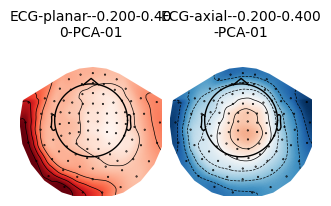

In [6]:
projs, events = compute_proj_ecg(raw, n_grad=1, n_mag=1, n_eeg=0, average=True, verbose=False)
print(projs)

ecg_projs = projs[-2:]
mne.viz.plot_projs_topomap(ecg_projs, info=raw.info);

Now let's do EOG. Here we compute an EEG projector, and need to pass
the measurement info so the topomap coordinates can be created.



[<Projection | PCA-v1, active : True, n_channels : 102>, <Projection | PCA-v2, active : True, n_channels : 102>, <Projection | PCA-v3, active : True, n_channels : 102>, <Projection | Average EEG reference, active : True, n_channels : 60>, <Projection | EOG-planar--0.200-0.200-PCA-01, active : False, n_channels : 203, exp. var : 92.15%>, <Projection | EOG-axial--0.200-0.200-PCA-01, active : False, n_channels : 102, exp. var : 87.40%>, <Projection | EOG-eeg--0.200-0.200-PCA-01, active : False, n_channels : 59, exp. var : 98.50%>]


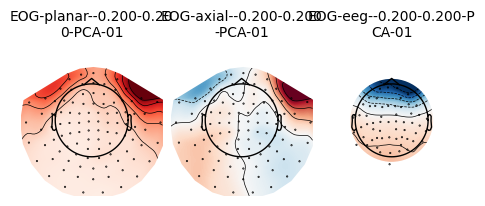

In [7]:
projs, events = compute_proj_eog(raw, n_grad=1, n_mag=1, n_eeg=1, average=True, verbose=False)
print(projs)

eog_projs = projs[-3:]
mne.viz.plot_projs_topomap(eog_projs, info=raw.info);

Exercise
-------------
What are we plotting here? Is it the SSP operator?

Add SSP projections
---------------------

In [8]:
raw = raw.add_proj(eog_projs + ecg_projs)

5 projection items deactivated


Now MNE will apply the projs on demand at any later stage,
so watch out for proj parmeters in functions or to it explicitly
with the ``.apply_proj`` method



Demonstrate SSP cleaning on some evoked data
--------------------------------------------



    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']


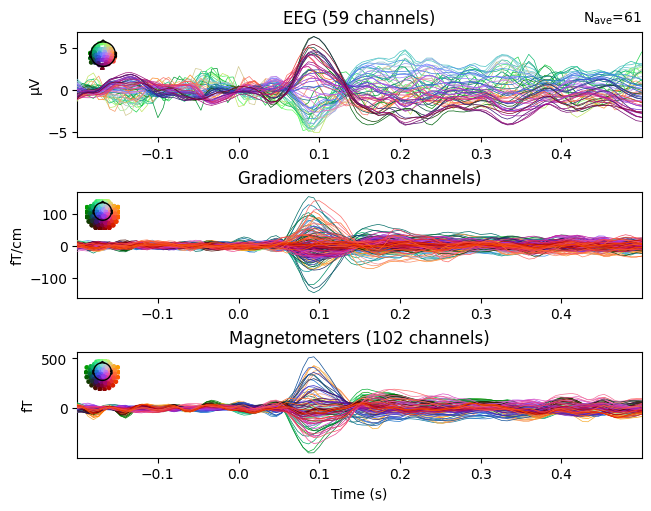

    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']


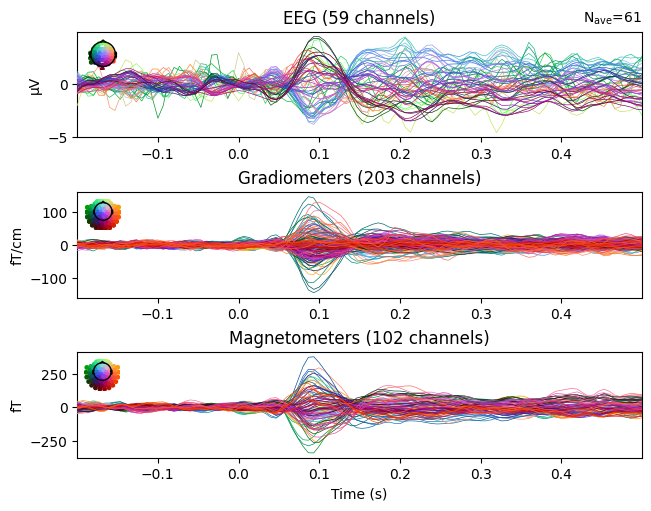

In [9]:
events = mne.find_events(raw, stim_channel='STI 014', verbose=False)
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)
# this can be highly data dependent
event_id = {'auditory/right': 2}

epochs_no_proj = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5,
                            proj=False, baseline=(None, 0), reject=reject,
                            verbose=False)
epochs_no_proj.average().plot(spatial_colors=True, time_unit='s');


epochs_proj = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5, proj=True,
                         baseline=(None, 0), reject=reject, verbose=False)
epochs_proj.average().plot(spatial_colors=True, time_unit='s');

Interactive topomaps with SSP applied

In [10]:
%matplotlib qt

# raw = mne.io.read_raw_fif(raw_fname, preload=True)
evoked = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5,
                    proj='delayed', baseline=(None, 0),
                    reject=reject, verbose=False).average()

# set time instants in seconds (from 50 to 150ms in a step of 10ms)
times = np.arange(0.05, 0.15, 0.01)

fig = evoked.plot_topomap(times, proj='interactive', time_unit='s');

    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
3 projection items deactivated
Created an SSP operator (subspace dimension = 3)
3 projection items activated
SSP projectors applied...
5 projection items deactivated
Created an SSP operator (subspace dimension = 5)
5 projection items activated
SSP projectors applied...
3 projection items deactivated
Created an SSP operator (subspace dimension = 3)
3 projection items activated
SSP projectors applied...
4 projection items

Now you should see checkboxes. Remove a few SSP and see how the auditory
pattern suddenly drops off



Exercises
---------

1) Can you compute your own proj using empty room data?

In [11]:
erm_fname = data_path / 'sample/MEG/ernoise_raw.fif'
mne.compute_proj_raw?

Signature:
mne.compute_proj_raw(
    raw,
    start=0,
    stop=None,
    duration=1,
    n_grad=2,
    n_mag=2,
    n_eeg=0,
    reject=None,
    flat=None,
    n_jobs=None,
    meg='separate',
    verbose=None,
)
Docstring:
Compute SSP (signal-space projection) vectors on continuous data.

This function aims to find those SSP vectors that
will project out the ``n`` most prominent signals from the data for each
specified sensor type. Consequently, if the provided input data contains high
levels of noise, the produced SSP vectors can then be used to eliminate that
noise from the data.

Parameters
----------
raw : instance of Raw
    A raw object to use the data from.
start : float
    Time (in seconds) to start computing SSP.
stop : float | None
    Time (in seconds) to stop computing SSP. None will go to the end of the file.
duration : float | None
    Duration (in seconds) to chunk data into for SSP
    If duration is ``None``, data will not be chunked.

n_grad : int | float between 

2) How would you compute the SSP from the evoked baseline instead of empty room?

In [12]:
raw = mne.io.read_raw_fif(raw_fname, preload=True, verbose=False)
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)
evoked = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5,
                    proj='delayed', baseline=(None, 0),
                    reject=reject, verbose=False).average()

projs = mne.compute_proj_evoked(evoked.copy().crop(tmax=0), n_grad=0, n_mag=2, n_eeg=0)
mne.viz.plot_projs_topomap(projs, info=evoked.info);

    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
Adding projection: axial--0.200-0.000-PCA-01
Adding projection: axial--0.200-0.000-PCA-02


Try making `reject=None`. What happens? Why?